### **Customer Churn Prediction**
<p align="center">
  <img src="images/customer_churn_prediction-banner.jpg" alt="banner-churn-prediction" height="300px">
</p>
<div style="text-align: right; margin-left: auto; margin-right: auto; width: 590px;">
  <a href="http://www.freepik.com">Designed by starline / Freepik</a>
</div>

**Introduction**

Customer churn is the rate at which customers stop doing business with a company. It is a critical metric for any business that values long-term customer relationships. Churn prediction involves identifying customers who are likely to stop using a service or product, allowing companies to take proactive actions to retain them. This process is especially useful for subscription-based industries, such as telecommunications, streaming services, and SaaS providers.

**Importance of Churn Prediction**

Customer acquisition is often more costly than retention, meaning it is less expensive to retain existing customers than to acquire new ones. By identifying potential churners early, companies can focus on targeted retention strategies, such as personalized marketing campaigns, improved customer support, or product enhancements tailored to customer needs. Additionally, a well-performing churn model can provide insights of customer behavior, enabling data-driven decision-making across departments.

**Measuring and Calculating Churn**

Churn rate is commonly expressed as a percentage of the total customer base that leaves within a specific period. It is calculated as follows:

$$ Churn\_rate = \frac{number\_of\_churned\_customers}{total\_customers} \cdot 100 $$

For example, if a company has 1,000 customers at the start of the quarter and 50 of them churn by the end of that quarter, the churn rate is:
$$ Churn\_rate = \frac{50}{1000} \cdot 100 = 5\% $$

The ideal churn rate varies by industry. However, for subscription-based services, a churn rate below 5% is generally considered healthy, while churn above 10% may indicate issues with customer satisfaction or competition.

**Predicting Customers Likely to Churn**

Machine learning models can be powerful tools for predicting churn, as they can process large amounts of customer data and identify patterns associated with leaving. Some of the most effective techniques for churn prediction include:
1. Logistic Regression: Often used as a baseline for classification tasks due to its interpretability.
2. Decision Trees and Random Forests: These models can capture non-linear relationships and work well with mixed data types.
3. Gradient Boosting (e.g., XGBoost): Generally performs well in classification tasks due to its capacity to handle complex relationships.

**Strategies to Reduce Churn**

Once customers at risk of churning are identified, the following strategies can be effective to improve retention:

- Personalized Engagement: Customized communication can improve customer satisfaction. For instance, sending special offers, discounts, or personalized recommendations can re-engage customers.
- Customer Support: Improving the support experience can reduce frustration and dissatisfaction.
- Product Improvements: By analyzing feedback from customers at risk of churning, companies can enhance their offerings to meet customer needs more effectively.
- Loyalty Programs: Offering rewards for long-term use can encourage loyalty and keep customers coming back.

By implementing such strategies and consistently monitoring the churn rate, companies can sustain and grow their customer base, ultimately improving long-term profitability.

### 1. Data Acquisition

#### 1.1. Import packages and inititial configuration

Packages that will be used in this notebook and initial configuration of the notebook.
- `pandas` - data manipulation
- `numpy` - general manipulation of arrays
- `matplotlib` and `seaborn`- data visualization  
- `prprint` - improve readability of data structures prints
- `scikit-learn` - classes and functions to prepare the data, create and evaluate the models


In [30]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


np.random.seed(42)
pd.set_option('display.max_columns', None)
sns.set_theme()

#### 1.2. Get familiar to the dataset

This dataset, provided by IBM Cognos Analytics, contains information about a fictional telecom company that provided home phone and Internet services to 7043 customers in California during Q3. Each row represents a customer and each column contains customer's attributes.

**Variables dictionary**

According to IBM Cognos Analytics, the dataset includes information about:
- Services each customer has subscribed to: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information: tenure, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic information: gender, age range, and if they have partners and dependents
- Churn status: whether the customer left within the last month.

Descriptions of each feature are provided below:

- `customerID`: A unique ID that identifies each customer.
- `gender`: The customer’s gender: Male, Female.
- `SeniorCitizen`: Indicates if the customer is 65 or older: Yes, No.
- `Partner`: Indicates if the customer is married: Yes, No.
- `Dependents`: Indicates if the customer lives with any dependents: Yes, No.       Dependents could be children, parents, grandparents, etc.
- `tenure`: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- `PhoneService`: Indicates if the customer subscribes to home phone service with the company: Yes, No.
- `MultipleLines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.
- `InternetService`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- `OnlineSecurity`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.
- `OnlineBackup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.
- `DeviceProtection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.
- `TechSupport`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.
- `StreamingTV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No.
- `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- `PaperlessBilling`: Indicates if the customer has chosen paperless billing: Yes, No.
- `PaymentMethod`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
- `MonthlyCharges`: Indicates the customer’s current total monthly charge for all their services from the company.
- `TotalCharges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- `Churn`: Yes = the customer left the company this quarter. No = the customer remained with the company.

In [2]:
# dataset path
DATA_PATH = "datasets\\WA_Fn-UseC_-Telco-Customer-Churn.csv"

# import the dataset to a dataframe
df = pd.read_csv(DATA_PATH)

# dataset size and display the firsts 5 inputs
print(f"""Dataset size: \tSamples: {df.shape[0]}
        \tFeatures: {df.shape[1]}""")
df.head()

Dataset size: 	Samples: 7043
        	Features: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data science process. It involves investigating the dataset to uncover patterns, detect anomalies, and check assumptions through visual and statistical methods. EDA helps in understanding the structure and quality of the data before applying machine learning models, ensuring that potential issues such as missing values, outliers, or skewed distributions are addressed.

In this section, we will perform a series of initial analyses to get a better understanding of the dataset. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This dataset consists of three numeric features and 18 categorical features. Although TotalCharges is classified as an object type, it contains numeric values. Therefore, the first step is to cast this feature to a float data type. The `convert_to_float` function will handle the cast operation.

In [4]:
def convert_to_float(input_value):
    """
    Converts an input to a float and handles any invalid input values.

    Args:
        input_value: the value to be converted to float.

    Returns:
        The float representation of the input or np.nan if conversion fails.
    """

    if input_value.strip() == "":
        return np.nan
    
    try:
        return float(input_value)
    except ValueError:
        return np.nan
    
df["TotalCharges"] = df["TotalCharges"].apply(convert_to_float)

The next step is to check for missing values and the number of unique values in each feature using the `isnull` and `nunique` methods.

In [5]:
print(f"Missing values by column:\n{df.isnull().sum()}")
print(f"\nUnique values by column:\n{df.nunique()}")

Missing values by column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Unique values by column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Mo

The `TotalCharges` column has 11 missing values, which will be handled below. As for the unique values per feature, all categorical features have fewer than five categories. The categories for each column will also be displayed below.
Additionally, the CustomerID column is irrelevant to the project’s goal, so it will be removed. The missing values in TotalCharges will be filled with the median.

In [6]:
# create a copy of the dataset
df_clean = df.copy()

# remove the customerID column
df_clean = df_clean.drop("customerID", axis=1)

# fill the missing values in TotalCharges with the median
totalCharges_median = df_clean["TotalCharges"].median()
df_clean["TotalCharges"] = df_clean["TotalCharges"].fillna(totalCharges_median)

In [7]:
# unique values of categorical variables
print("Unique values of categorical variables:")
print(np.unique(df_clean.select_dtypes("object").values))

# categories per column
unique_vals = {}
for column in df.columns[1:]:
    if df[column].dtype == 'O':
        unique_vals[column] = df[column].unique().tolist()

print("\nCategorical values for each feature:")
pprint.pprint(unique_vals, width=200, compact=True, sort_dicts=False)

Unique values of categorical variables:
['Bank transfer (automatic)' 'Credit card (automatic)' 'DSL'
 'Electronic check' 'Female' 'Fiber optic' 'Mailed check' 'Male'
 'Month-to-month' 'No' 'No internet service' 'No phone service' 'One year'
 'Two year' 'Yes']

Categorical values for each feature:
{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check', 'Mailed ch

The describe method provides insights into value distribution, mean, and median, allowing us to conclude that there are no outlier values.
The tenure feature indicates that half of the customers have been with this telecom company for more than 29 months. The average monthly charge is $64.76, and the average total charges per customer amount to $2,281.91.
Moreover, the boxplots of the `MonthlyCharges` and `TotalCharges` columns confirm that there are no outliers.

In [8]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


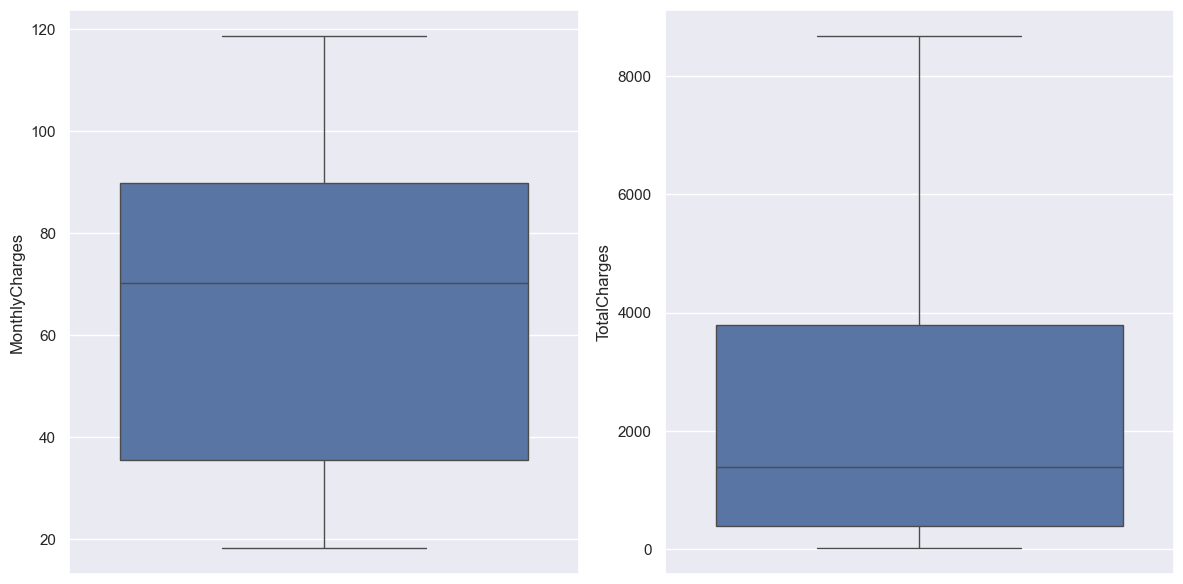

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(df["MonthlyCharges"],ax=ax[0])
sns.boxplot(df["TotalCharges"],ax=ax[1])
plt.tight_layout()

In [10]:
no_churn = df_clean["Churn"].value_counts().iloc[0]
churn = df_clean["Churn"].value_counts().iloc[1]
total_clients = df_clean["Churn"].count()

print(f"Amount of churn:\t {churn} --> {(churn/total_clients * 100):.2f}%")
print(f"Amount of loyal clients: {no_churn} --> {(no_churn/total_clients * 100):.2f}%")


Amount of churn:	 1869 --> 26.54%
Amount of loyal clients: 5174 --> 73.46%


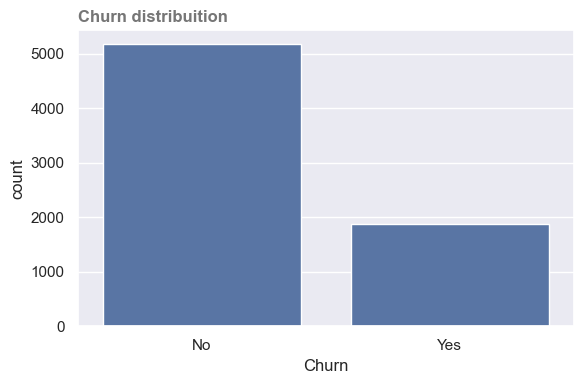

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(df_clean, x="Churn")
ax.set_title("Churn distribuition", color="#767676", fontsize=12, fontweight="bold", loc="left")

plt.tight_layout()

Even though the dataset is not fully balanced in terms of the target variable (`Churn`), a 74/26 split isn’t so skewed that it necessarily requires balancing techniques. To determine if balancing is needed, we can begin by training and evaluating the model without it. If performance is unsatisfactory, we can then apply a balancing technique and repeat the evaluation process.

Another potential source of bias could be gender. Therefore, below we will plot the gender distribution and churn rate by customer gender.

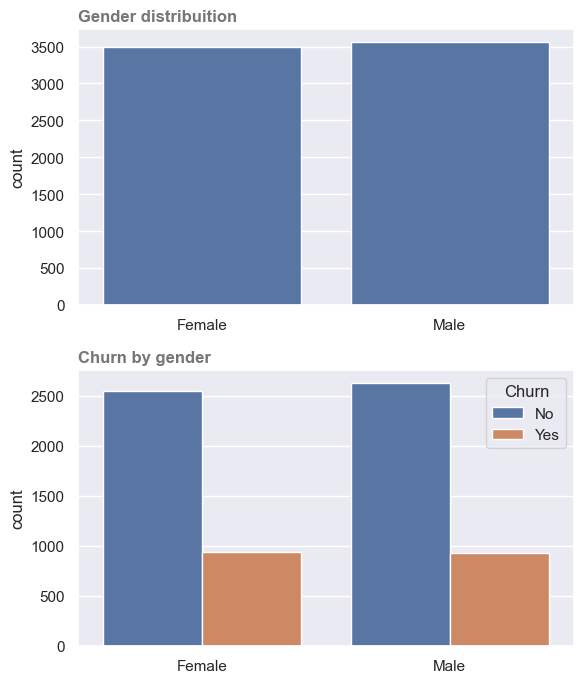

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
sns.countplot(df_clean, x="gender", ax=axes[0])
axes[0].set_title("Gender distribuition", color="#767676", fontsize=12, fontweight="bold", loc="left")
axes[0].set_xlabel("")

sns.countplot(df_clean, x="gender", hue="Churn", ax=axes[1])
axes[1].set_title("Churn by gender", color="#767676", fontsize=12, fontweight="bold", loc="left")
axes[1].set_xlabel("")
plt.tight_layout()

As shown in the plot above, the dataset is well-balanced with respect to customer gender. Additionally, the churn rate is very similar regardless of customer gender.

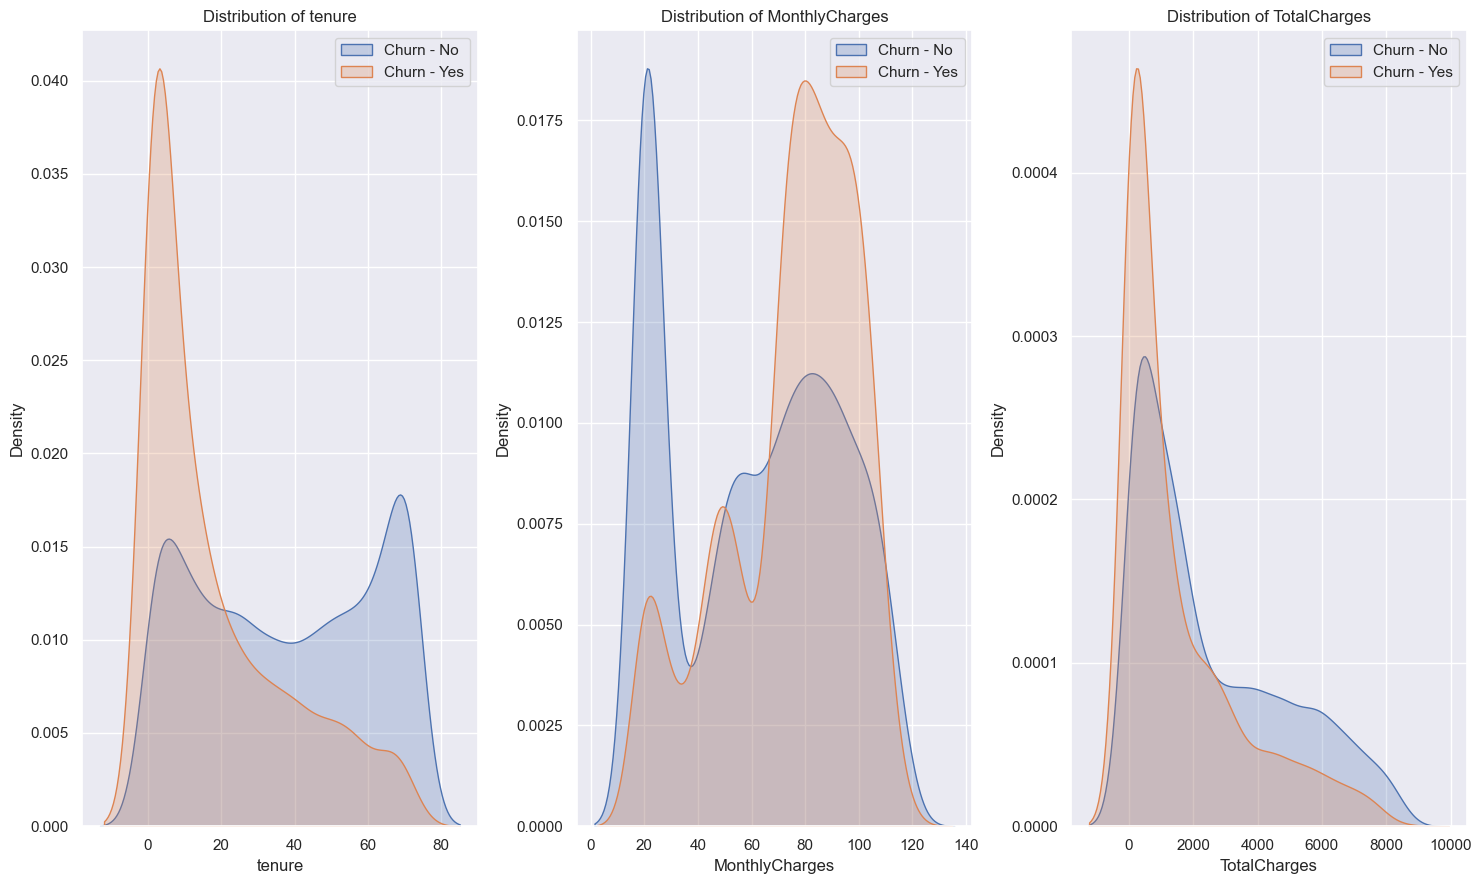

In [13]:
numerical_features = df_clean.drop(unique_vals.keys(), axis=1).columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,9))

for i, feature in enumerate(numerical_features[1:]):
    sns.kdeplot(data=df_clean[df_clean["Churn"]=="No"], x=feature, fill=True, label="Churn - No", ax=axes[i])
    sns.kdeplot(data=df_clean[df_clean["Churn"]=="Yes"], x=feature, fill=True, label="Churn - Yes", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].legend()

plt.tight_layout()

The three density plots above indicate that, among the numerical features, tenure and MonthlyCharges may be highly important for training the machine learning model. As shown, recent customers (less than 20 months) and those with higher monthly charges are more likely to churn.

In summary, the Exploratory Data Analysis (EDA) has shown the following:
- The dataset contains:
    - 3 numeric features
    - 18 categorical features

- The TotalCharges column has 11 missing values, which has been filled with the median.
- Each categorical feature has fewer than five unique categories.
- Summary statistics (e.g., distribution, mean, and median) show no outliers.
    - Tenure: 50% of customers have been with the company for over 29 months.
    - MonthlyCharges: The average charge is $64.76.
    - TotalCharges: Average per customer is $2,281.91.
- Target variable (Churn) is not fully balanced with a 74/26 split, but balancing techniques may not be necessary. If initial model performance is poor, balancing will be reconsidered.
- The dataset is balanced in terms of gender, and churn rates do not vary significantly by gender.
- Density plots suggest that tenure and MonthlyCharges may be influential features for predicting churn:
    - Recent customers (under 20 months) and those with higher monthly charges are more likely to churn.

### 3. Data pre-processing

#### 3.1. Categorical Feature Encoding and Standardize

**Encoding**

Machine learning algorithms generally work best with numerical data.  However, real-world datasets often contain categorical features, representing characteristics like gender, country, or product type.  These features are typically represented as strings or other non-numeric values.  Categorical Feature Encoding is the crucial process of transforming these categorical variables into a numerical format that machine learning models can understand and utilize effectively.

Most machine learning algorithms are based on mathematical calculations.  They can't directly interpret or process string values.  Encoding categorical features into numerical representations allows algorithms to:

* **Perform calculations and comparisons:** Algorithms can compute distances, calculate relationships, and perform other mathematical operations on numerical data.
* **Identify patterns and relationships:**  Encoded features enable algorithms to discover patterns and correlations between features and the target variable.
* **Avoid errors and misinterpretations:**  Directly using string values can lead to errors or biases in model training and predictions.

Several techniques are available for encoding categorical features, each with its strengths and weaknesses:

* **Label Encoding (Ordinal Encoding):** Assigns a unique integer to each category. This is suitable for ordinal categorical variables where there's a natural order or ranking (e.g., education levels: High School < Bachelor's < Master's).  However, for nominal variables without an inherent order (e.g., colors: red, blue, green), label encoding can introduce artificial relationships that mislead the model.

* **One-Hot Encoding:** Creates new binary (0 or 1) features for each category. This avoids the problem of imposing artificial order.  Each category gets its own column, and a 1 indicates the presence of that category for a given data point.  One-hot encoding is widely used for nominal variables. However, it can lead to high dimensionality if the categorical feature has many unique values.

* **Target Encoding (Mean Encoding or Likelihood Encoding):** Replaces each category with the mean (or other statistic) of the target variable for that category. This captures the relationship between the categorical feature and the target.  However, it can be prone to overfitting, especially with high cardinality features or noisy data. Careful regularization or cross-validation is essential.

* **Binary Encoding:**  Combines the benefits of one-hot encoding and target encoding.  First, categories are ordered based on the target variable's mean. Then, ordered categories are converted to ordinal, and finally ordinal numbers are transformed into their binary code representation.  This helps reduce dimensionality while still capturing some information about the target.

* **Hashing Trick:** Uses a hash function to convert categories into a fixed number of numerical features. This is useful for very high cardinality features where one-hot encoding would create too many columns. However, there's a risk of collisions (different categories mapping to the same hash value), which can impact model performance.

The choice of encoding technique depends on the nature of the categorical variable (nominal or ordinal), the cardinality (number of unique categories), and the specific machine learning algorithm being used.  Experimentation and careful evaluation are often necessary to determine the most effective encoding strategy for a given dataset.


**Standardize**

In the world of machine learning, not all data is created equal. Features with vastly different scales can introduce bias and hinder the performance of many algorithms. That's where standardization, a powerful preprocessing technique, comes to the rescue.

**Why Standardize?**

Imagine training a model to predict house prices. You have features like "number of bedrooms" (ranging from 1 to 5) and "house area in square feet" (ranging from 800 to 5000). The large difference in scales can mislead some algorithms, making them prioritize the "house area" feature simply because its values are numerically larger.

Standardization levels the playing field by transforming each feature to have:
- Mean (average) of 0
- Standard deviation of 1

This ensures that all features contribute equally to the model's learning process, regardless of their original scales.
____

Besides the two different data types in the dataset (numerical and categorical), we can further divide the categorical variables into binary and multi-category values. Categorical variables with binary values will be encoded using LabelEncoder, while those with multiple categories will be encoded using OneHotEncoder.

Additionally, the numerical variables will be standardized using StandardScaler.

These three preprocessing steps (label encoding, one-hot encoding, and standardization) will be performed using ColumnTransformer. This approach is particularly useful for datasets with heterogeneous data types, since we may want to scale the numeric features and encode the categorical ones.

In [14]:
# Identify categorical columns and binary categorical columns
categorical_cols = df_clean.select_dtypes(include=["object", "category"]).columns
binary_categorical_features = df_clean[categorical_cols].nunique().loc[(df_clean[categorical_cols].nunique()==2)].keys()
categorical_features = df_clean[categorical_cols].nunique().loc[(df_clean[categorical_cols].nunique()>2)].keys()

print(f"Numerical features: {numerical_features}")
print(f"\nBinary categorical features: {binary_categorical_features}")
print(f"\nCategorical features: {categorical_features}")


Numerical features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Binary categorical features: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'Churn'],
      dtype='object')

Categorical features: Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')


In [15]:
# the target variable won't be encoded in the pipeline
# remove the target value from the list that will be passed to the preprocessor step
binary_categorical_features = binary_categorical_features[:-1]

# encode the target variable (churn) separately
label_encoder = LabelEncoder()
df_clean["Churn_encoded"] = label_encoder.fit_transform(df_clean["Churn"])

In [16]:
# creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("bin_cat_encoding", OrdinalEncoder(), binary_categorical_features),
        ("cat_encoding", OneHotEncoder(handle_unknown="error"), categorical_features),
        ("num_encoding", StandardScaler(), numerical_features)
    ])

### 4. Creation of a baseline model

In this section, we will create a baseline model to compare against further improvements, such as trying other model types, training with a balanced dataset, and tuning hyperparameters.

The first step is to split the dataset into training and test sets using the `train_test_split` method.

Since we will later evaluate other model types, we’ll create a function called `model_evaluation`. This function will assess model performance in terms of recall using the `cross_val_score` method. The `estimator` parameter in `cross_val_score` will receive a `pipeline` argument that includes encoding and standardization steps, along with the machine learning model.

In [17]:
# Dataset for training and validation and target variable y
X = df_clean.drop(["Churn","Churn_encoded"], axis=1)
y = df_clean["Churn_encoded"]

# Splitting the dataset into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
def model_evaluation(X, y, prepro, clf):
    """
    Evaluates a machine learning model's performance using cross-validation.
    This function creates a pipeline with a specified preprocessor and classifier,
    then applies cross-validation to evaluate the model's recall score. It prints
    the recall scores for each fold and returns the average recall.

    Parameters:
    X : array-like or DataFrame
        The feature matrix used as input for training the model.
    y : array-like
        The target variable used for model evaluation.
    prepro : transformer object
        The preprocessor to apply to the data (e.g., StandardScaler, PCA).
    clf : estimator object
        The classifier model to validate (e.g., LogisticRegression, RandomForestClassifier).

    Returns:
    float
        The mean recall score from cross-validation.
    """

    pipeline = Pipeline([
        ("preprocessor", prepro),
        ("model", clf)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    print(f"Recall per cross validation fold: {scores}")

    print(f"Average Recall: {scores.mean():.2f} (+/- {scores.std():.2f})")

    return scores.mean()

In [19]:
# criar baseline e ver desempenho
rf = KNeighborsClassifier(n_neighbors=3)
score_baseline = model_evaluation(X_train, y_train, preprocessor, rf)

Recall per cross validation fold: [0.51505017 0.49498328 0.5083612  0.53177258 0.4916388 ]
Average Recall: 0.51 (+/- 0.01)


c:\Users\hugom\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hugom\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Now that we have a model baseline, we can take additional steps to improve model performance. These actions could include:

- Balancing the training dataset with respect to the target variable.
- Testing other machine learning models.
- Tuning the model’s hyperparameters.

### 5. Balancing the dataset

In this dataset, we face an imbalance issue where only 25% of the records represent churned customers, while the remaining 75% represent those who have not churned. This imbalance can lead to biased model predictions, as the model may tend to favor the majority class (non-churn) and overlook the minority class (churn), which is critical to our analysis.

To address this, we will apply the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is an oversampling technique that generates synthetic samples for the minority class by creating new data points based on the feature space of existing instances. It does this by selecting random samples from the minority class and creating synthetic examples along the line segments that join any or all of the k-nearest neighbors of each selected sample.

Using SMOTE will allow us to balance the dataset and help the model better recognize patterns in churned customers, improving its ability to predict churn accurately.

The SMOTE object will be added into the `model_evaluation` function, defined earlier, along with the pipeline instantiation. Note that we used the `Pipeline` class from the `ImbalancedLearn` package, as the SMOTE object lacks `fit` and `transform` methods. To differentiate this pipeline from the `Pipeline` in `Scikit-Learn`, we’ll refer to it as `ImbPipeline`.

In [42]:
def model_evaluation(X, y, preprocessor, clf):
    """
    Evaluates a machine learning model's performance using cross-validation 
    with SMOTE sampling to handle class imbalance.
    This function creates a pipeline with a specified preprocessor, SMOTE 
    for balancing classes, and a classifier. It applies cross-validation to 
    evaluate the model's recall score. The function prints the recall scores 
    for each fold and returns the average recall.

    Parameters:
    X : array-like or DataFrame
        The feature matrix used as input for training the model.
    y : array-like
        The target variable used for model evaluation.
    prepro : transformer object
        The preprocessor to apply to the data (e.g., StandardScaler, PCA).
    clf : estimator object
        The classifier model to validate (e.g., LogisticRegression, RandomForestClassifier).

    Returns:
    float
        The mean recall score from cross-validation.
    """

    pipeline = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(sampling_strategy="minority", random_state=42)),
        ("model", clf)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    print(f"Recall per cross validation fold: {scores}")

    print(f"Average Recall: {scores.mean():.2f} (+/- {scores.std():.2f})")

    return scores.mean()

In [43]:
rf = KNeighborsClassifier(n_neighbors=3)
score_baseline_balanced = model_evaluation(X_train, y_train, preprocessor, rf)

Recall per cross validation fold: [0.68561873 0.66220736 0.65886288 0.72909699 0.69565217]
Average Recall: 0.69 (+/- 0.03)


It’s clear that by applying a balancing technique, such as SMOTE, to the training dataset, we improved the average recall by approximately 35%.